In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA	# linear
from sklearn.manifold import TSNE	# non-linear
import numpy as np
import matplotlib.pyplot as plt
import os

# Generating Embeddings

In [2]:
import google.generativeai as genai

genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


In [3]:
def embed_fn(text, model='models/text-embedding-004'):
  return genai.embed_content(model=model,
                             content=text,
                             task_type="retrieval_query")["embedding"]

In [4]:
words = ['computer', 'internet', 'smartphone', 'software',
         'pizza', 'pasta', 'burger', 'ice cream',
         'forest', 'mountain', 'river',
         'football', 'hockey', 'tennis']

embs = [embed_fn(word) for word in words]

In [20]:
print(f"{len(embs)} embeddings each with {len(embs[0])} dims")

14 embeddings each with 768 dims


# Dim Reduction and KMeans

In [13]:
embs_2d_pca = np.array(PCA(n_components=2, random_state=42).fit_transform(embs))
embs_2d_tsne = np.array(TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(np.array(embs)))

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)

# TSNE

C:\Users\joena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


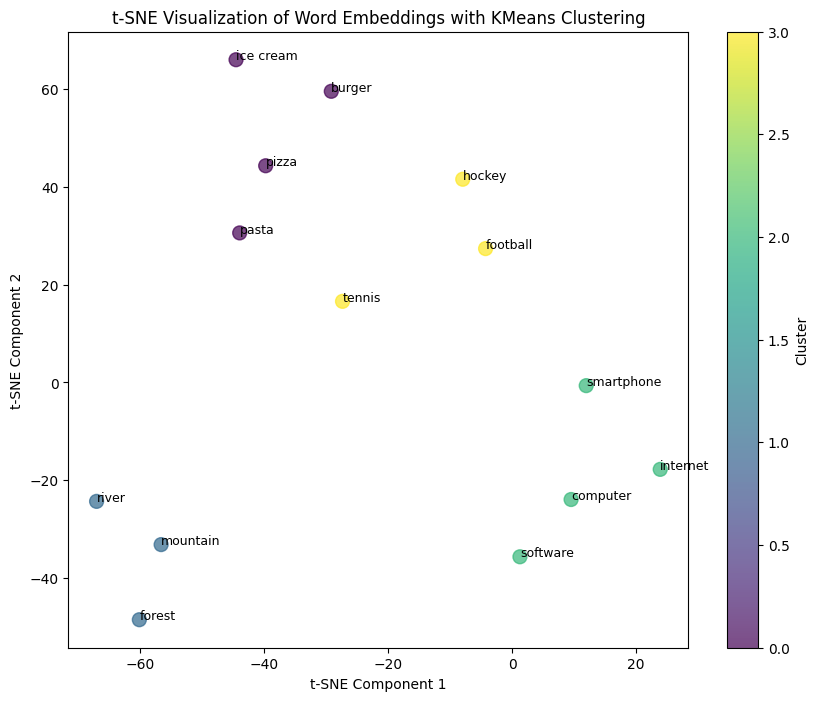

In [16]:
kmeans.fit(embs_2d_tsne)
labels = kmeans.labels_

# Step 3: Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(embs_2d_tsne[:, 0], embs_2d_tsne[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, (embs_2d_tsne[i, 0], embs_2d_tsne[i, 1]), fontsize=9)

plt.title("t-SNE Visualization of Word Embeddings with KMeans Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster')
plt.show()

# PCA

C:\Users\joena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


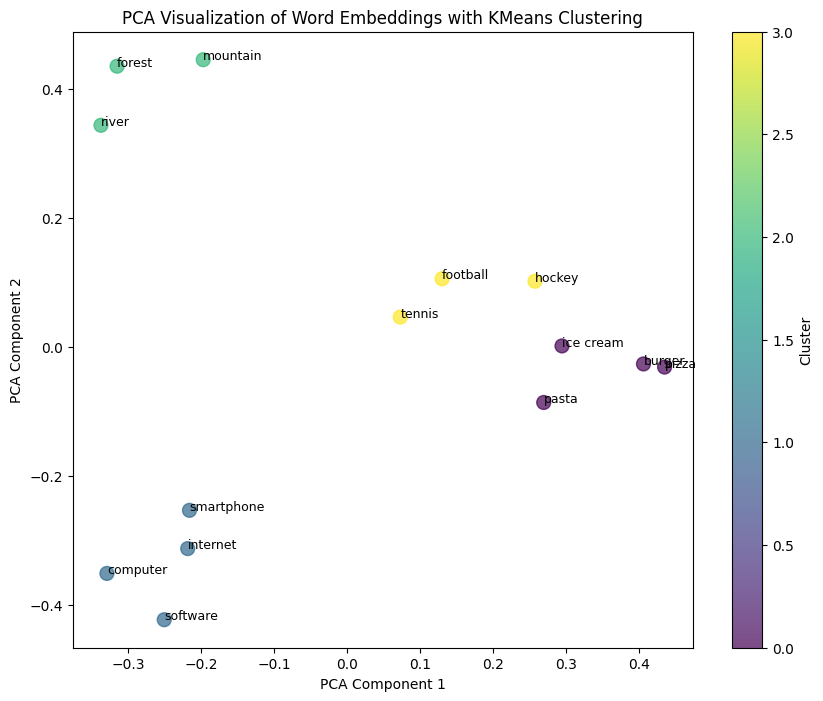

In [17]:
kmeans.fit(embs_2d_pca)
labels = kmeans.labels_

# Step 3: Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(embs_2d_pca[:, 0], embs_2d_pca[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)

# Annotate words
for i, word in enumerate(words):
    plt.annotate(word, (embs_2d_pca[i, 0], embs_2d_pca[i, 1]), fontsize=9)

plt.title("PCA Visualization of Word Embeddings with KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()